Install dependencies

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn

Run simulation and save data

In [8]:
import SimCellPack as scp

cellModel = scp.SimCellPack(cellModel="P14", numCells = 3, simCycles = 3, seed = 1, \
                            profile = "us06", balancing = "active", getSOCsWhen = "all", \
                                sampleFactor = 30, utilization = [2,2])

cellModel.startSim()

feedback = [int(cellModel.balancing=="active")]*cellModel.numCells
data_soc = []
data_cumulpwr = []

code = 1
# Code coding: 0 - simulation waiting, 1 - discharging, 2 - charging, 3 - resting, >= 4 - unassingned
while code > 0:
    code, state = cellModel.getSimStep()
    data_soc.append(state[0:cellModel.numCells])
    data_cumulpwr.append(state[cellModel.numCells:])

    if code > 0:
        cellModel.sendSimFeedback(feedback)

# cellModel.resetSim()

# code = 1
# while code > 0:
#     code, state = cellModel.getSimStep()
#     data.append(state)

#     if code > 0:
#         cellModel.sendSimFeedback(feedback)

cellModel.stopSim()


Plotting

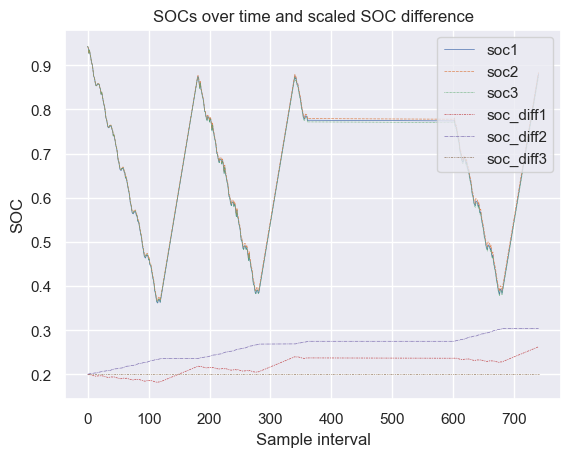

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


d = data_soc[:]

data_dict = {}

minSocIndex = 0
minVal = 1

for i in range(len(d[0])):
    soc = [item[i] for item in d]
    if min(soc) < minVal:
        minVal = min(soc)
        minSocIndex = i
    data_dict['soc'+str(i+1)] = soc

minSocIndex = 2

for i in range(len(d[0])):
    socdff = [(item[i]-item[minSocIndex])*10+0.2 for item in d]
    data_dict['soc_diff'+str(i+1)] = socdff


df = pd.DataFrame(data_dict)

sns.set_theme()
g = sns.lineplot(data=df, linewidth = 0.5)
g.set_title("SOCs over time and scaled SOC difference")
g.set_xlabel("Sample interval")
g.set_ylabel("SOC")
plt.legend(loc="upper right")


<Axes: >

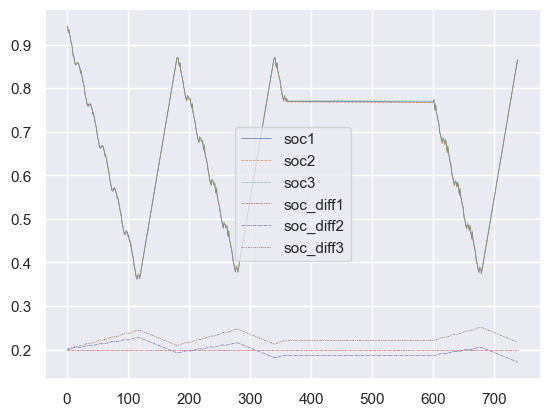

In [9]:
import seaborn as sns
import pandas as pd


d = data_soc[:]

data_dict = {}

minSocIndex = 0
minVal = 1

for i in range(len(d[0])):
    soc = [item[i] for item in d]
    if min(soc) < minVal:
        minVal = min(soc)
        minSocIndex = i
    data_dict['soc'+str(i+1)] = soc

minSocIndex = 0

for i in range(len(d[0])):
    socdff = [(item[i]-item[minSocIndex])*10+0.2 for item in d]
    data_dict['soc_diff'+str(i+1)] = socdff


df = pd.DataFrame(data_dict)

sns.set_theme()
sns.lineplot(data=df, linewidth = 0.5)

<Axes: >

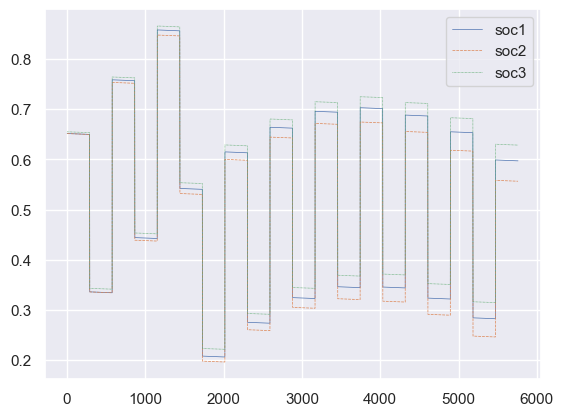

In [4]:
import seaborn as sns
import pandas as pd


d = data_soc[:]

data_dict = {}
for i in range(len(d[0])):
    soc = [item[i] for item in d]
    data_dict['soc'+str(i+1)] = soc


df = pd.DataFrame(data_dict)

sns.set_theme()
sns.lineplot(data=df, linewidth = 0.5)